#### BATCH GRADIENT DESCENT

In [1]:
%matplotlib inline
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn import preprocessing

In [2]:
X, y, coef = make_regression(n_samples=150,
                                      n_features=1,
                                      n_informative=1,
                                      noise=10,
                                      coef=True,
                                      random_state=0)

X = np.interp(X, (X.min(), X.max()), (0, 20))
y = np.interp(y, (y.min(), y.max()), (20000, 150000))

In [3]:
X.shape

(150, 1)

In [4]:
norm = preprocessing.Normalizer()
X_norm = norm.fit_transform(X)
# https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

Text(0.5, 1.0, 'Experience Vs. Salary')

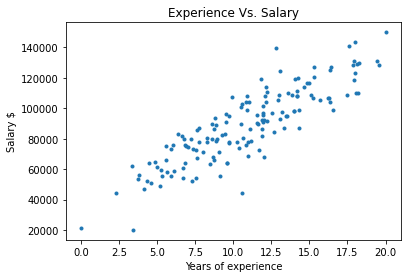

In [5]:
plt.ion() 
plt.plot(X,y,'.',label='training data')
plt.xlabel('Years of experience');plt.ylabel('Salary $')
plt.title('Experience Vs. Salary')

In [6]:
n = X.shape[1]
m = X.shape[0]
W = np.random.uniform(size=n+1)

ones_vec = np.ones((m,n+1))
ones_vec[:,:-1] = X_norm
X = ones_vec

In [7]:
X.shape

(150, 2)

In [8]:
W

array([0.1149107 , 0.07535967])

In [9]:
def h(W: ndarray, X: ndarray) -> float:
    return np.sum(np.multiply(W, X))

In [10]:
def cost_func(X: ndarray, Y: ndarray, W:ndarray) -> float:
    return np.sum([np.subtract(h(W, x), y) ** 2 for x, y in zip(X, Y)]) / 2

In [11]:
def gradient_func(X: ndarray, Y: ndarray, W:ndarray) -> float:
    gradient = []
    for j in range(len(W)):
        current_feature = []
        for x,y in zip(X, Y):
            thesis = h(W, x)
            a = np.subtract(thesis, y) * x[j]
            current_feature.append(a)
        gradient.append(np.sum(current_feature) / m)
        
    return np.sum(gradient)

In [12]:
def train(W: ndarray, X: ndarray, Y: ndarray, lr: float, epochs: int)-> ndarray:
    for i in range(epochs):
        cost = cost_func(X, Y, W)
        print(f'Current epoch: {i+1}, Running cost: {cost}')
        gradient = gradient_func(X, Y, W)
        W = np.subtract(W, np.multiply(lr, gradient))
        print(f'Current epoch: {i+1}, Running Weights: {W}')
        print('-------------')
        
    return W

In [13]:
lr = 0.0001
epochs = 59

result = train(W, X, y, lr, epochs)
result

Current epoch: 1, Running cost: 639024425183.342
Current epoch: 1, Running Weights: [17.89384458 17.85429356]
-------------
Current epoch: 2, Running cost: 638550383801.2395
Current epoch: 2, Running Weights: [35.66570245 35.62615143]
-------------
Current epoch: 3, Running cost: 638076719680.9873
Current epoch: 3, Running Weights: [53.43048712 53.3909361 ]
-------------
Current epoch: 4, Running cost: 637603432522.3445
Current epoch: 4, Running Weights: [71.18820141 71.14865038]
-------------
Current epoch: 5, Running cost: 637130522025.3093
Current epoch: 5, Running Weights: [88.93884812 88.8992971 ]
-------------
Current epoch: 6, Running cost: 636657987890.1187
Current epoch: 6, Running Weights: [106.68243008 106.64287906]
-------------
Current epoch: 7, Running cost: 636185829817.2487
Current epoch: 7, Running Weights: [124.41895009 124.37939907]
-------------
Current epoch: 8, Running cost: 635714047507.4128
Current epoch: 8, Running Weights: [142.14841097 142.10885994]
---------

array([1037.05599275, 1037.01644173])

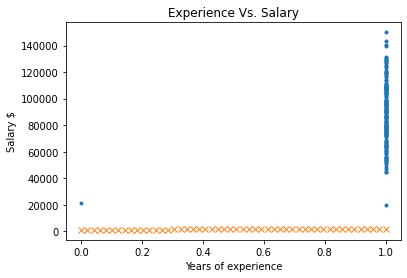

In [15]:
plt.ion() 
plt.plot(X[:, 0],y,'.',label='training data')
plt.xlabel('Years of experience');plt.ylabel('Salary $')
plt.title('Experience Vs. Salary')

domain = np.expand_dims(np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1])), axis=1)
ones_vec = np.ones((domain.shape[0],2))
ones_vec[:,:-1] = domain
x_test = ones_vec

y_test = [h(result, x_) for x_ in x_test]
plt.plot(domain,y_test,'x',label='test data')